In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import matplotlib.pyplot as plt
import os

raw_US = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us.csv', 
                     index_col = 'date',
                     parse_dates = True).sort_index()
raw_states = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv',
                     index_col = 'date',
                     parse_dates = True).sort_index()
print(raw_US.head())
print(raw_states.head())

            cases  deaths
date                     
2020-01-21      1       0
2020-01-22      1       0
2020-01-23      1       0
2020-01-24      2       0
2020-01-25      3       0
                 state  fips  cases  deaths
date                                       
2020-01-21  Washington    53      1       0
2020-01-22  Washington    53      1       0
2020-01-23  Washington    53      1       0
2020-01-24    Illinois    17      1       0
2020-01-24  Washington    53      1       0


total percent		percent weekly case
Washington 	 19.53
Illinois 	 -27.47
California 	 5.47
Arizona 	 59.97
Massachusetts 	 -63.51
Wisconsin 	 -17.85
Texas 	 8.78
Nebraska 	 -35.89
Utah 	 48.73
Florida 	 64.73
New York 	 -30.53
Rhode Island 	 -35.81
Georgia 	 17.74
North Carolina 	 25.19
New Jersey 	 -43.76
Colorado 	 -29.81
Maryland 	 -27.96
Tennessee 	 -4.83
Indiana 	 -12.74
Kentucky 	 44.24
Minnesota 	 -15.02
Pennsylvania 	 -17.85
South Carolina 	 40.72
Kansas 	 -18.71
Missouri 	 13.65
Virginia 	 -20.27
Connecticut 	 -28.4
Iowa 	 11.69
Louisiana 	 10.1
Ohio 	 -15.91
Michigan 	 78.85
Arkansas 	 38.1
Mississippi 	 -8.74
Alabama 	 -15.06


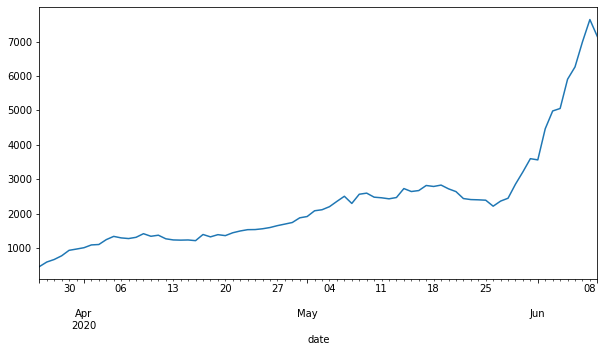

In [99]:
list_of_states = raw_states['state'].unique()
new_weekly_cases_state = {}
percent_weekly_cases_states = {}
total_case = {}
print('total percent\t\tpercent weekly case')
for state in list_of_states:
    total_case[state] = round(100*raw_states.loc[raw_states['state'] == state].cases[-1]/raw_US.cases[-1], 2)
    if total_case[state] > 0.5:
        new_weekly_cases_state[state] = raw_states.loc[raw_states['state'] == state].cases.diff(7)
        percent_weekly_cases_states[state] = 100*raw_states.loc[raw_states['state'] == state].cases.diff(7)/raw_US.cases.diff(7)
        #print(total_case[state], "\t", state, "\t", round(percent_weekly_cases_states[state][-1],2) )
        print(state, "\t", round(100*new_weekly_cases_state[state].diff(7)[-1]/new_weekly_cases_state[state][-8], 2) )

plt.figure(figsize = (10,5))        
#percent_weekly_cases_states['New York'].plot()
#percent_weekly_cases_states['New Jersey'].plot()
new_weekly_cases_state['Arizona'][60:].plot()


In [103]:
(total_case.values())

dict_values([1.3, 6.55, 6.9, 1.43, 5.22, 1.08, 3.98, 0.8, 0.64, 0.25, 3.32, 19.31, 0.79, 2.55, 0.26, 1.88, 8.28, 1.42, 2.99, 0.5, 1.4, 0.03, 1.96, 0.6, 1.43, 0.37, 4.07, 0.77, 0.48, 0.54, 0.77, 0.05, 2.6, 2.22, 1.12, 2.2, 1.97, 3.28, 0.28, 0.51, 0.5, 0.91, 0.46, 0.15, 0.05, 0.03, 0.13, 1.08, 0.16, 0.03, 0.26, 0.0, 0.06, 0.11, 0.0])

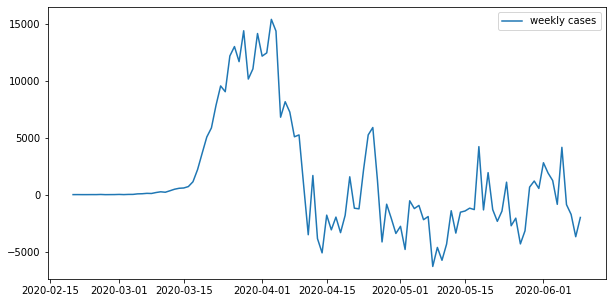

In [98]:
plt.figure(figsize = (10,5))
plt.plot(raw_US.cases.diff(7).diff()[30:], label = "weekly cases" )
plt.legend()

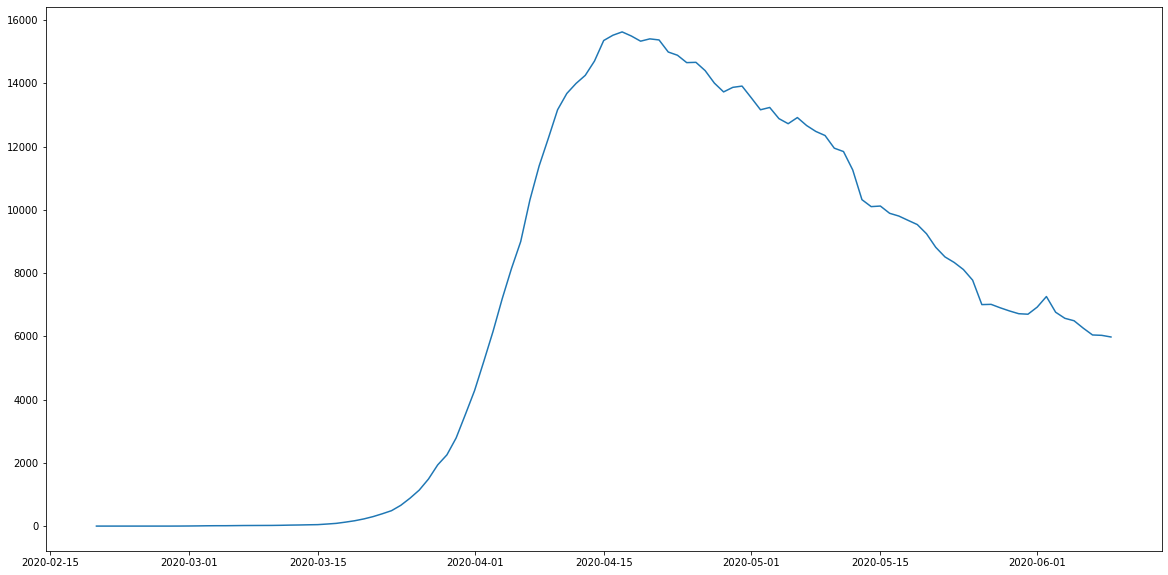

In [4]:
plt.figure(figsize = (20,10))
plt.plot(raw_US.deaths.diff(7)[30:], label = "weekly deaths")

In [14]:
###t = raw_US.index.to_list()[30:]
#data1 = raw_US.cases.diff(7).diff()[30:]
#data2 = raw_US.deaths.diff(7).diff()[30:]

###data1 = raw_US.cases.diff(7)[30:]
###data2 = raw_US.deaths.diff(7)[30:]


###fig, ax1 = plt.subplots( figsize=(20,15) )

###color = 'tab:red'
###ax1.set_xlabel('date')
###ax1.set_ylabel('Cases', color=color)
#ax1.set_ylabel('Cases')
###ax1.plot(t, data1, color=color)
#ax1.plot(t, data1)
#ax1.tick_params(axis='y', labelcolor=color)
###ax1.tick_params(axis='y')
###ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

#color = 'tab:blue'
#ax2.set_ylabel('Deaths', color=color)  # we already handled the x-label with ax1
###ax2.set_ylabel('Deaths')  # we already handled the x-label with ax1
#ax2.plot(t, data2, color=color)
###ax2.plot(t, data2)
#ax2.tick_params(axis='y', labelcolor=color)
###ax2.tick_params(axis='y')

###fig.tight_layout()  # otherwise the right y-label is slightly clipped
###plt.show()

<Figure size 1440x720 with 0 Axes>

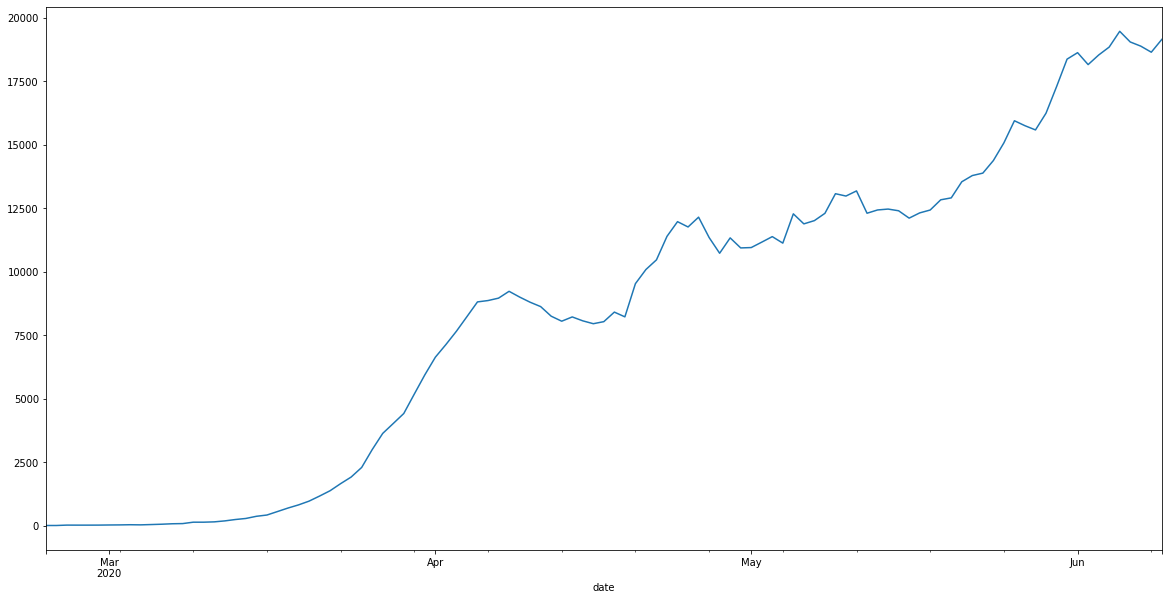

<Figure size 1440x720 with 0 Axes>

In [16]:
cal = raw_states.loc[raw_states['state'] == 'California'].cases
NY = raw_states.loc[raw_states['state'] == 'New York'].cases
NJ = raw_states.loc[raw_states['state'] == 'New Jersey'].cases
HI = raw_states.loc[raw_states['state'] == 'Hawaii'].cases
WA = raw_states.loc[raw_states['state'] == 'Washington'].cases
plt.figure(figsize = (20,10))
cal.diff(7)[30:].plot()
plt.figure(figsize = (20,10))

In [46]:
round(0.55,1)

0.6

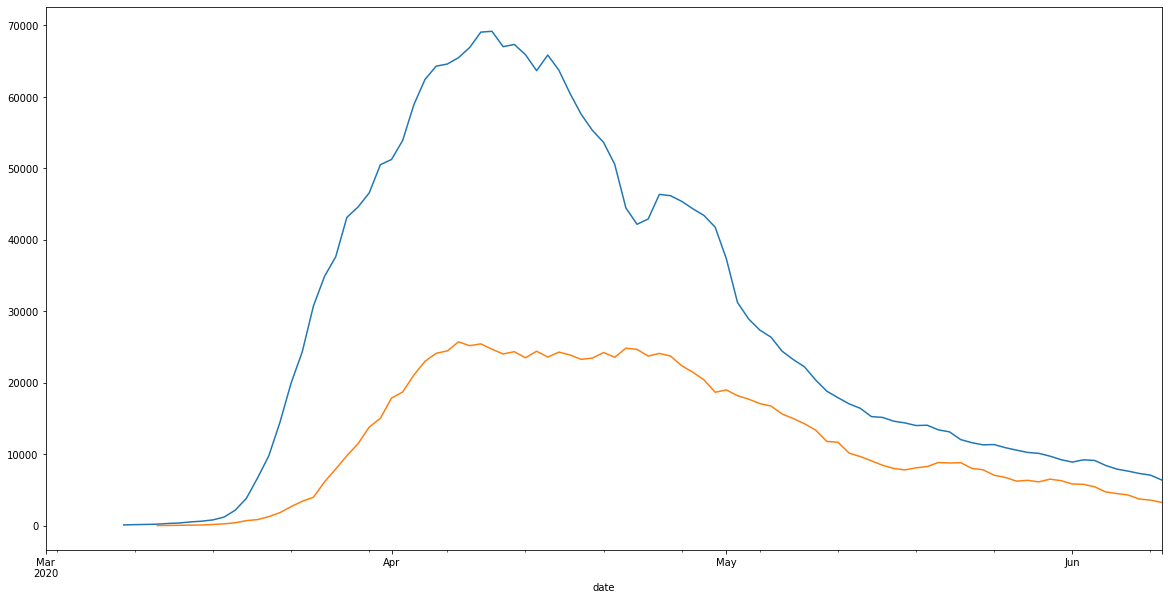

In [31]:
plt.figure(figsize = (20,10))
(NY.diff(7)[:]).plot()
NJ.diff(7)[:].plot()

In [ ]:
plt.figure(figsize = (20,10))
WA.diff(7).plot()

In [ ]:
NY.plot()